In [ ]:
#1. Import liberary and load data set


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Data/API_SP.POP.TOTL_DS2_en_csv_v2_557268.csv", skiprows=4)

# Show first 5 rows
print(df.head())
print(df.info())


                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130075728.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2016         2017         2018         2019  \
0      58190.0  .

In [ ]:
#2. Basic Data Cleaning

# Drop unwanted columns (Indicator related)
df_clean = df.drop(["Indicator Name", "Indicator Code"], axis=1)

# Melt wide → long format
df_long = df_clean.melt(
    id_vars=["Country Name", "Country Code"],
    var_name="Year",
    value_name="Population"
)

# Convert Year to numeric
df_long["Year"] = pd.to_numeric(df_long["Year"], errors="coerce")

# Drop NA values
df_long = df_long.dropna(subset=["Population"])

print(df_long.head())
print(df_long.describe())


                  Country Name Country Code    Year   Population
0                        Aruba          ABW  1960.0      54922.0
1  Africa Eastern and Southern          AFE  1960.0  130075728.0
2                  Afghanistan          AFG  1960.0    9035043.0
3   Africa Western and Central          AFW  1960.0   97630925.0
4                       Angola          AGO  1960.0    5231654.0
               Year    Population
count  17195.000000  1.719500e+04
mean    1992.030532  2.182465e+08
std       18.760828  7.142278e+08
min     1960.000000  2.715000e+03
25%     1976.000000  1.019463e+06
50%     1992.000000  6.790788e+06
75%     2008.000000  4.706578e+07
max     2024.000000  8.142056e+09


c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


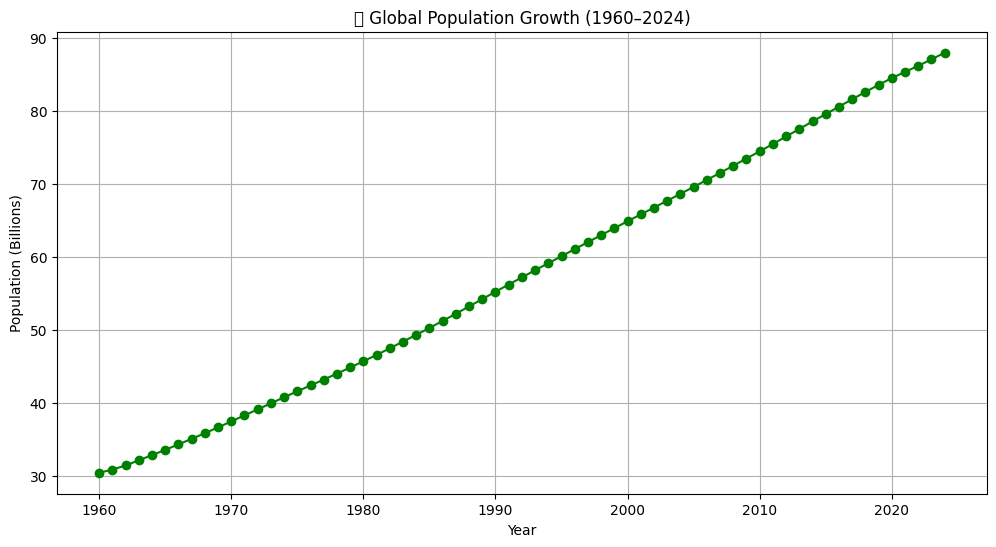

In [ ]:
# 3. Global Population Growth Trend
global_pop = df_long.groupby("Year")["Population"].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(global_pop["Year"], global_pop["Population"]/1e9, marker="o", color="green")
plt.title("🌍 Global Population Growth (1960–2024)")
plt.xlabel("Year")
plt.ylabel("Population (Billions)")
plt.grid(True)
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_1804\839144654.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Population", y="Country Name", data=top10, palette="mako")


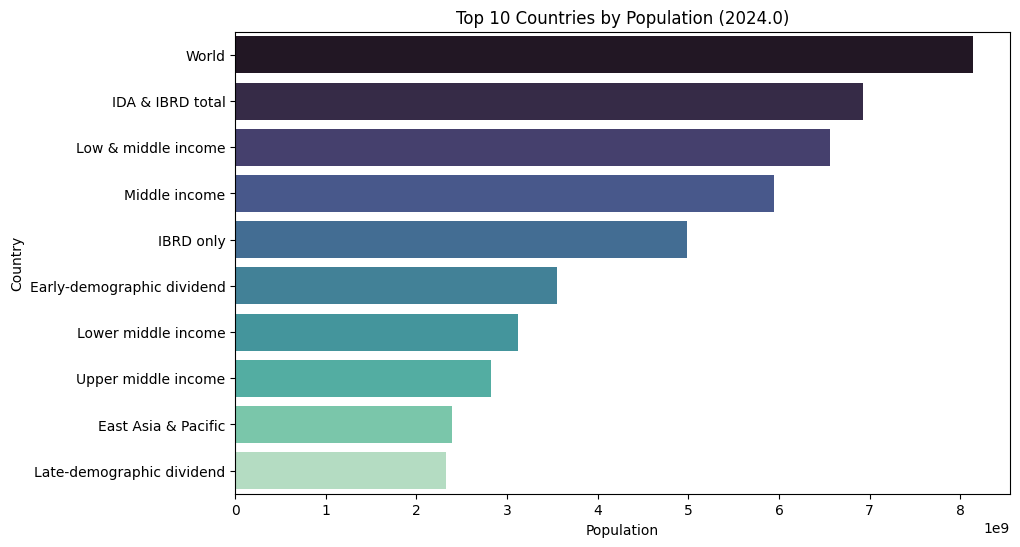

In [ ]:
# 4.Top 10 Countries in 2024

latest_year = df_long["Year"].max()
top10 = df_long[df_long["Year"] == latest_year].nlargest(10, "Population")

plt.figure(figsize=(10,6))
sns.barplot(x="Population", y="Country Name", data=top10, palette="mako")
plt.title(f"Top 10 Countries by Population ({latest_year})")
plt.xlabel("Population")
plt.ylabel("Country")
plt.show()


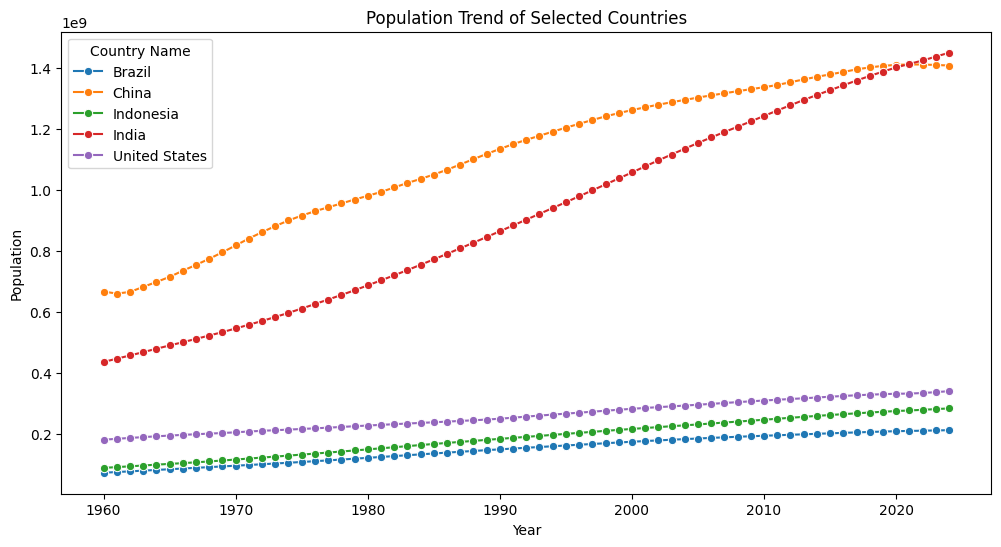

In [ ]:
# 5. Country Comparison (India, China, US, Indonesia, Brazil)
countries = ["India", "China", "United States", "Indonesia", "Brazil"]
trend = df_long[df_long["Country Name"].isin(countries)]

plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Population", hue="Country Name", data=trend, marker="o")
plt.title("Population Trend of Selected Countries")
plt.ylabel("Population")
plt.show()


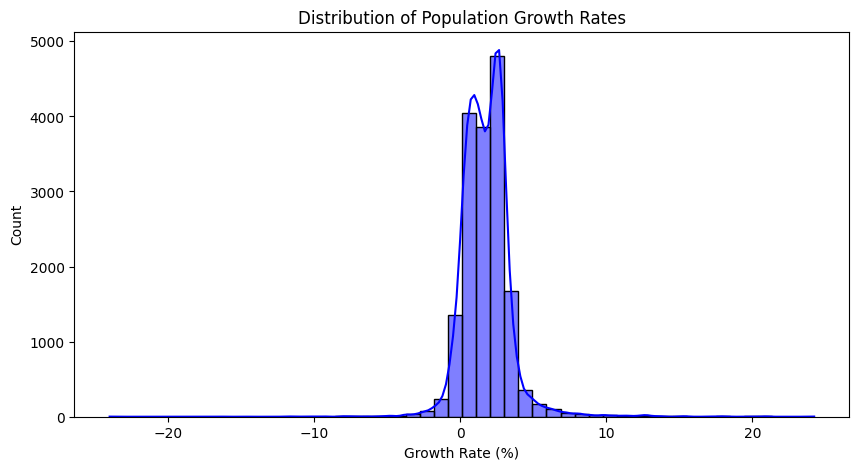

In [ ]:
# 6.Population Growth Rate Distribution

df_long["Growth Rate"] = df_long.groupby("Country Name")["Population"].pct_change() * 100

plt.figure(figsize=(10,5))
sns.histplot(df_long["Growth Rate"].dropna(), bins=50, kde=True, color="blue")
plt.title("Distribution of Population Growth Rates")
plt.xlabel("Growth Rate (%)")
plt.show()


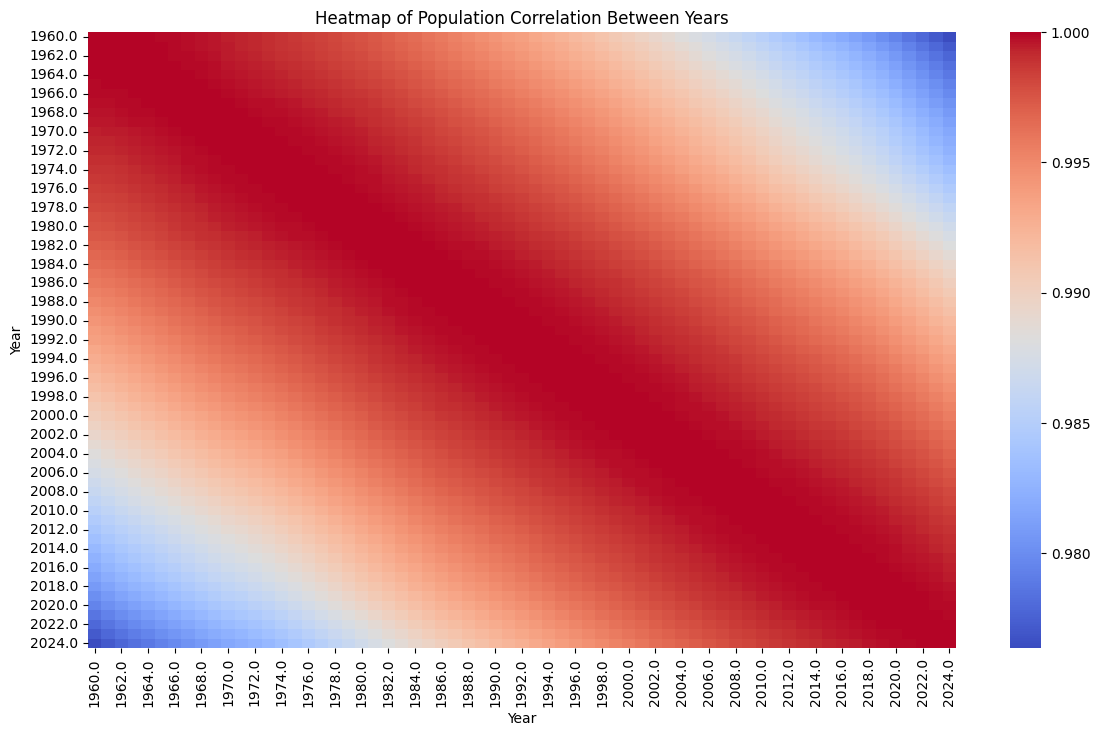

In [ ]:
#7.Heatmap of Correlation (Countries × Years)

#  Pivot table for heatmap
df_pivot = df_long.pivot(index="Country Name", columns="Year", values="Population")

plt.figure(figsize=(14,8))
sns.heatmap(df_pivot.corr(), cmap="coolwarm", cbar=True)
plt.title("Heatmap of Population Correlation Between Years")
plt.show()
